# b-taggers optimization studies

**Goal:** Look into the different b-taggers and how the current analysis selection criteria is impacted by the taggers currently supported by the FTAG group.

For initial studies, I'm looking at
- signal: a random 500 GeV mass resonance DAOD that I downloaded from the datasets folder, and made a mini-Ntuple for
- background: the 2015 data with the mini-Ntuples that were already processed by Mason.

**Step 1:** Look at the $m_{h1}$ vs $m_{h2}$ mass plane.

Note: I think h1 is the leading Higgs, but I need to check this in the code!

In [1]:
from root_numpy import root2array 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.14/04


The root files processed from Beojean's code contain four TTrees
1. `fullmassplane`
2. `sig`
3. `control`
4. `sideband`

So I want to start by plotting the distributions for the full mass plane TTree, and overlay the cuts that define the signal, control, and sideband regions.

I could also plot the sig, control and sidebands mass plane distributions as a santiy check!


In [3]:
sigDir = "../../hh4b-resolved-reconstruction/"
treeName = "fullmassplane"
#m500_file = root2array(sigDir + "test_M500.root", treeName)
m500_file = root2array(sigDir + "M500_mv2_70.root", treeName)

OSError: unable to access tree 'fullmassplane' in ../../hh4b-resolved-reconstruction/M500_mv2_70.root

Error in <TFile::TFile>: file ../../hh4b-resolved-reconstruction/M500_mv2_70.root does not exist


In [ ]:
df_sig = pd.DataFrame(m500_file)

In [ ]:
df_sig.head()

In [ ]:
for c in df_sig.columns:
    print(c)

In [ ]:
(210-55)/5

In [12]:
mBins = 31
mRange = (55,210)

plt.hist2d(df_sig.event_m_h1, df_sig.event_m_h2,
           bins=mBins, range=((mRange),(mRange)),
           cmap="YlGnBu")

clb = plt.colorbar()
clb.ax.text(4, 0.65, "Events / 25 GeV$^2$", fontsize=10, rotation=90, va='bottom')

plt.xlabel('$m_{2j}^{lead}$ [GeV]',fontsize=14)
plt.ylabel('$m_{2j}^{subl}$ [GeV]',fontsize=14)
plt.show()

NameError: name 'df_sig' is not defined

$$X_{HH} = \sqrt{\left( \frac{m_{2j}^{lead} - 120\text{ GeV}}{0.1 m_{2j}^{lead}} \right) + \left( \frac{m_{2j}^{subl} - 110\text{ GeV}}{0.1 m_{2j}^{subl}} \right)} < 1.6$$

Plan: I'm going to vary $m_{2j}^{lead}$ and solve for the function of $m_{2j}^{lead}$, using the positive and negative solutions to get both halves of the elipse.

To find the range of valid choices for $m_{2j}^{lead}$, set $m_{2h}^{subl}$ = 110 GeV and solve for $m_{2j}^{lead}$.

In [4]:
SR_x = np.linspace(120 / 1.16, 120 / 0.840000000001)

In [5]:
alpha = np.power(10*(SR_x - 120)/SR_x,2)

SR_y1 = 110 / (1 + 0.1 * np.sqrt(np.power(1.6,2) - alpha))
SR_y2 = 110 / (1 - 0.1 * np.sqrt(np.power(1.6,2) - alpha))

In [6]:
CR_x = np.linspace(124-30,124+30)

beta = np.sqrt(30**2 - np.power(CR_x-124, 2))

CR_y1 = 113 + beta
CR_y2 = 113 - beta

In [7]:
SB_x = np.linspace(126-45,126+45)

gamma = np.sqrt(45**2 - np.power(SB_x-126, 2))

SB_y1 = 116 + gamma
SB_y2 = 116 - gamma

In [ ]:
from matplotlib import colors as mcolors

In [ ]:
mBins = 31
mRange = (55,210)

plt.hist2d(df_sig.event_m_h1, df_sig.event_m_h2,
           bins=mBins, range=((mRange),(mRange)),
           cmap="YlGnBu")

clb = plt.colorbar()
clb.ax.text(4, 0.65, "Events / 25 GeV$^2$", fontsize=10, rotation=90, va='bottom')

plt.plot(SR_x, SR_y1,'hotpink')
plt.plot(SR_x, SR_y2,'hotpink')

plt.plot(CR_x, CR_y1,'darkorange')
plt.plot(CR_x, CR_y2,'darkorange')

plt.plot(SB_x, SB_y1,'mediumpurple')
plt.plot(SB_x, SB_y2,'mediumpurple')

plt.text(65,190,"500 GeV resonance")

plt.xlabel('$m_{2j}^{lead}$ [GeV]',fontsize=14)
plt.ylabel('$m_{2j}^{subl}$ [GeV]',fontsize=14)
plt.show()

Find the number of signal events in this signal region

In [ ]:
df_sig.tail()

In [ ]:
m500_sig = root2array(sigDir + "test_M500.root", 'sig')

In [ ]:
m500_sig[-1]

In [ ]:
s = m500_sig.shape[0]

In [ ]:
s

In [ ]:
m500_sig = pd.DataFrame(m500_sig)

## Estimating the QCD background

Ok, now that I think it looks good for the signal... time to calculate it for the 2015 data!

In [8]:
%%bash
ls ../../hh4b-resolved-reconstruction/btagStudies/

basic_SM_NR.root
data_15.root
duplicated_evts
M500_mv2_70.root
ttbar_allhad.root
ttbar_nonallhad.root


In [9]:
dataDir = "../../hh4b-resolved-reconstruction/btagStudies/"
treeName = "fullmassplane"
data15_file = root2array(dataDir + "data_15.root", treeName)

In [10]:
df_bkg = pd.DataFrame(data15_file)

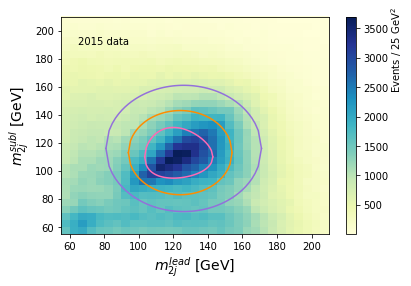

In [15]:
plt.hist2d(df_bkg.event_m_h1, df_bkg.event_m_h2,
           bins=mBins, range=((mRange),(mRange)),
           cmap="YlGnBu")

clb = plt.colorbar()
clb.ax.text(4, 0.65, "Events / 25 GeV$^2$", fontsize=10, rotation=90, va='bottom')

plt.plot(SR_x, SR_y1,'hotpink')
plt.plot(SR_x, SR_y2,'hotpink')

plt.plot(CR_x, CR_y1,'darkorange')
plt.plot(CR_x, CR_y2,'darkorange')

plt.plot(SB_x, SB_y1,'mediumpurple')
plt.plot(SB_x, SB_y2,'mediumpurple')

plt.text(65,190,"2015 data")

plt.xlabel('$m_{2j}^{lead}$ [GeV]',fontsize=14)
plt.ylabel('$m_{2j}^{subl}$ [GeV]',fontsize=14)
plt.savefig('figures/data15_massplane.pdf',bbox_inches='tight')
plt.show()

Since we want to stay blinded, we're going to estimate the background by looking at the number of background events in the sideband.

In [ ]:
data15_SB = root2array(dataDir + "data_15.root", 'sideband')

In [ ]:
b_SB = data15_SB.shape[0]

In [ ]:
b_SB

In [ ]:
data15_SB = pd.DataFrame(data15_SB)

Ok, so I *think* these are all the studies that I wanted to be able to do with the baseine tagger, so the next step that I'm going to look into is figuring out how to add a parameter that will let me swap out the tagger in Beojean's code. But to do this, I think I'm going to have to *understand* his code, so I think I'm going to try going through it, line by line.

- But another piece of good news: if I look at ratios of these variables, I'm not going to have to worry about cross section normalization!


## New metric: $m_{hh}$

Michael said I should also be looking at the $m_{hh}$ distribution for the signal and background samples.

To do this, I'm going to need to check Beojean's $2b \rightarrow 4b$ reweighting, which I don't think is done correcly right now.

- Perhaps as a pre-step, I could look into comparing the SB regions and overlay this w/ the SR for the signal sample that I have?

But we can't just pull the $m_{hh}$ out of the Ntuple, because in the final $m_{4j}$ discriminant, we need to multiply each Higgs boson candidate four momentum by a correction factor $m_{H} / m_{2j}$ (which I don't think he's done yet, and I don't know if he's done at all).



In [ ]:
myRange = (250,1250)
nBins=101

kwargs = {'bins':nBins, 'range':myRange, 'histtype':'step', 'linestyle':'--'}

plt.hist(m500_sig.event_m_hh, label='SR: 500 GeV resonance', **kwargs)
plt.hist(data15_SB.event_m_hh, color='k', label='SB: data 2015', **kwargs)

plt.legend()
plt.xlabel('UNSCALED $m_{hh}$ [GeV]',fontsize=12)
plt.savefig('figures/mhh_unscaled.pdf')
plt.show()

Note, the resonance is peaking slightly lower than 500 GeV, probably due to the semileptonic decays.

In [ ]:
df_sig.columns

In [ ]:
m500_sig['scaled_mhh'] = pd.Series(0,SR_500GeV.index)
data15_SB['scaled_mhh'] = pd.Series(0,SB_2015.index)

In [ ]:
from ROOT import TLorentzVector

In [ ]:
for i, (pT_h1,eta_h1,phi_h1,m_h1,pT_h2,eta_h2,phi_h2,m_h2) in m500_sig[['event_pT_h1','event_eta_h1','event_phi_h1','event_m_h1',
                                                                      'event_pT_h2','event_eta_h2','event_phi_h2','event_m_h2']].iterrows():
    
    if i < 5:
        print(m_h1, m_h2)
    
    p4_h1 = TLorentzVector()
    p4_h2 = TLorentzVector()
    
    
    p4_h1.SetPtEtaPhiM(pT_h1,eta_h1,phi_h1,m_h1)
    p4_h2.SetPtEtaPhiM(pT_h2,eta_h2,phi_h2,m_h2)
    
    p4_X = p4_h1 * (125/m_h1) + p4_h2 * (125/m_h2)
    
    m500_sig.loc[i,'scaled_mhh'] = p4_X.M()
    
    

In [ ]:
for i, (pT_h1,eta_h1,phi_h1,m_h1,pT_h2,eta_h2,phi_h2,m_h2) in data15_SB[['event_pT_h1','event_eta_h1','event_phi_h1','event_m_h1',
                                                                         'event_pT_h2','event_eta_h2','event_phi_h2','event_m_h2']].iterrows():
    
    if i < 5:
        print(m_h1, m_h2)
    
    if i % 10000 == 0:
        print('i =',i)
    
    p4_h1 = TLorentzVector()
    p4_h2 = TLorentzVector()
    
    
    p4_h1.SetPtEtaPhiM(pT_h1,eta_h1,phi_h1,m_h1)
    p4_h2.SetPtEtaPhiM(pT_h2,eta_h2,phi_h2,m_h2)
    
    p4_X = p4_h1 * (125/m_h1) + p4_h2 * (125/m_h2)
    
    data15_SB.loc[i,'scaled_mhh'] = p4_X.M()

In [ ]:
plt.hist(SR_500GeV.event_m_hh, bins=nBins, range=myRange, histtype='step', linestyle='--', color='C0', label='SR: 500 GeV resonance: UNSCALED')
plt.hist(SB_2015.event_m_hh, bins=nBins, range=myRange, histtype='step', linestyle='--', color='k', label='SB: data 2015: UNSCALED')

plt.hist(m500_sig.scaled_mhh, bins=nBins, range=myRange, histtype='step', color='C0', label='SR: 500 GeV resonance: SCALED')
plt.hist(data15_SB.scaled_mhh, bins=nBins, range=myRange, histtype='step', color='k', label='SB: data 2015: SCLAED')

plt.legend()
plt.xlabel('$m_{hh}$ [GeV]',fontsize=12)
plt.savefig('figures/mhh_scaled.pdf')
plt.show()

**Good news:**
- The current scaling corrects the center and decreases the resolution of the signal
- Italso shifts the QCD to lower $m_{hh}$
